In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import cv2 
import os 
import xml.etree.ElementTree as ET 
from PIL import Image 
from pathlib import Path 
import random 
import warnings 

warnings.filterwarnings("ignore")

In [91]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import cv2 
import os 
import xml.etree.ElementTree as ET 
from PIL import Image 
from pathlib import Path 
import random 
import warnings 

warnings.filterwarnings("ignore")

# Define directories
images_dir = (r'C:\Users\ADMIN\stanforddogs\images')
annotation_dir = (r'C:\Users\ADMIN\stanforddogs\annotations')

# Function to list all the directories inside the given path 
def list_directories(path):
    return [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))] 

# List subdirectories
images_subdirs = list_directories(images_dir) 
annotations_subdirs = list_directories(annotation_dir)

# Print the directories
print("Directories in Images folder:", images_subdirs) 
print("\nDirectories in Annotations folder:", annotations_subdirs)  # Fixed typo here


Directories in Images folder: ['n02092002-Scottish_deerhound', 'n02093991-Irish_terrier', 'n02097474-Tibetan_terrier', 'n02106166-Border_collie']

Directories in Annotations folder: ['n02092002-Scottish_deerhound', 'n02093991-Irish_terrier', 'n02097474-Tibetan_terrier', 'n02106166-Border_collie']


In [ ]:
def get_bounding_boxes (annot_path):
    tree = ET.parse(annot_path) 
    root = tree.getroot() 
    objects = root.findall('object') 
    bbox = [] 
    for o in objects: 
        bndbox = o.find('bndbox') 
        xmin = int(bndbox.find('xmin').text) 
        ymin = int(bndbox.find('ymin').text) 
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text) 
        bbox.append((xmin, ymin, xmax, ymax))
    return bbox 
    for subdir in images_subdirs: 
 #Path to subdirectories of image and annotation 
        img_subdir_path = images_dir + "\\" + subdir 
        annot_subdir_path = annotation_dir +"\\"+ subdir 
 # Getting all xml files in the annotation subdirectory
        images = [img_subdir_path +"\\" + f for f in os.listdir(img_subdir_path)] 
        annotations = [annot_subdir_path +"\\" + f for f in os.listdir(annot_subdir_path)] 
        for i, annot in enumerate(annotations): 
            bbox = get_bounding_boxes(annot) 
            dog_image_path = images[i]
            im = Image.open(dog_image_path) 
            for j, box in enumerate (bbox): 
                im2 = im.crop (box) 
                im2 = im2.resize((128, 128)) 
                new_path = str(dog_image_path).replace(str(images_dir), r'C:\Users\ADMIN\stanforddogs\cropped').replace('.jpg', f'-{j}.jpg') 
                head, tail = os.path.split(new_path)
                Path(head).mkdir(parents=True, exist_ok=True) 
                im2.save(new_path)
cropped_dir = Path(r'C:\Users\ADMIN\stanforddogs\cropped')


In [201]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import cv2
import os
import xml.etree.ElementTree as ET
from PIL import Image
from pathlib import Path
import random
import warnings
selected_images = {}
cropped_dir = Path(r'C:\Users\ADMIN\stanforddogs\cropped')
for subdir in cropped_dir.iterdir():
    if subdir.is_dir():
        # List all JPG files in the subdirectory
        image_files = list(subdir.glob('*.jpg'))  # Use '*.jpg' instead of '*jpg'
        if len(image_files) >= 1:
            selected_images[subdir.name] = image_files[:1]  # Select one image
        else:
            print(f"Warning: Less than 1 image found for class {subdir.name}")

# Check if any images were selected
if selected_images:
    print("\nSelected Images:")
    for class_name, images in selected_images.items():
        print(f"Class: {class_name}")
        for img in images:
            print(img)
else:
    print("No images were selected from any class.")



Selected Images:
Class: n02092002-Scottish_deerhound
C:\Users\ADMIN\stanforddogs\cropped\n02092002-Scottish_deerhound\n02092002_3.jpg
Class: n02093991-Irish_terrier
C:\Users\ADMIN\stanforddogs\cropped\n02093991-Irish_terrier\n02093991_50.jpg
Class: n02097474-Tibetan_terrier
C:\Users\ADMIN\stanforddogs\cropped\n02097474-Tibetan_terrier\n02097474_16.jpg
Class: n02106166-Border_collie
C:\Users\ADMIN\stanforddogs\cropped\n02106166-Border_collie\n02106166_5.jpg


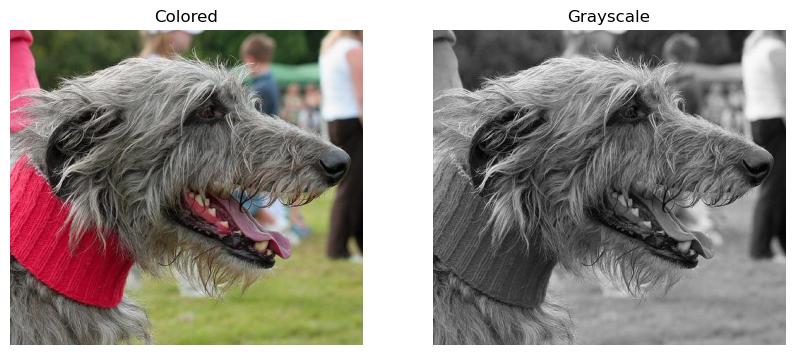

Saved grayscale image to: C:\Users\ADMIN\stanforddogs\grayscale\n02092002_3_gray.jpg


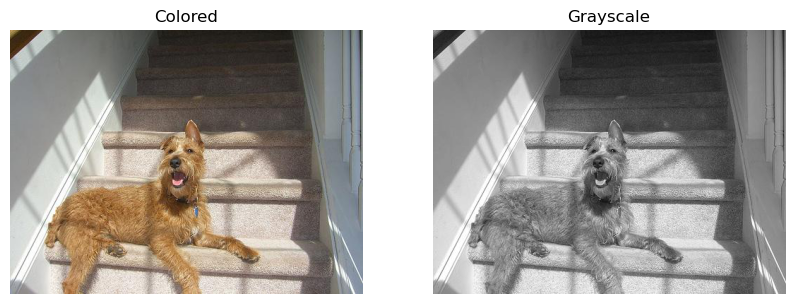

Saved grayscale image to: C:\Users\ADMIN\stanforddogs\grayscale\n02093991_50_gray.jpg


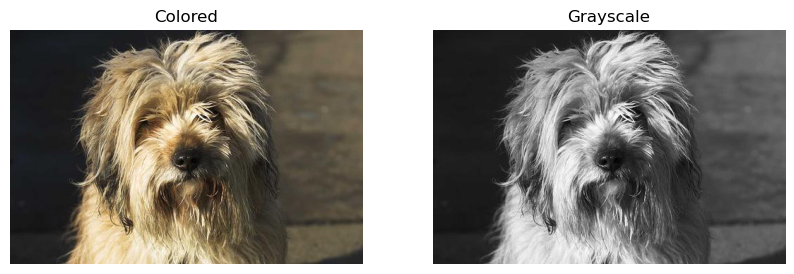

Saved grayscale image to: C:\Users\ADMIN\stanforddogs\grayscale\n02097474_16_gray.jpg


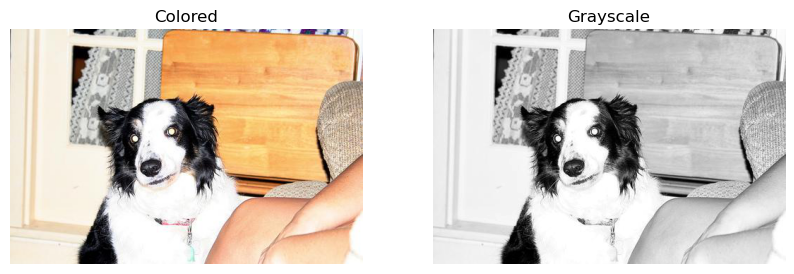

Saved grayscale image to: C:\Users\ADMIN\stanforddogs\grayscale\n02106166_5_gray.jpg


In [17]:
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

def display_images(image_path, grayscale_dir):
    img = Image.open(image_path)
    gray_img = img.convert('L')
    
    # Display images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Colored')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')
    
    plt.show()
    
    # Save the grayscale image
    gray_image_path = grayscale_dir / (image_path.stem + '_gray.jpg')
    gray_img.save(gray_image_path)
    print(f"Saved grayscale image to: {gray_image_path}")

# Define the selected image directories
selected_images = [
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02092002-Scottish_deerhound'),
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02093991-Irish_terrier'),
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02097474-Tibetan_terrier'),
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02106166-Border_collie'),
]

# Create a directory for grayscale images
grayscale_dir = Path(r'C:\Users\ADMIN\stanforddogs\grayscale')
grayscale_dir.mkdir(parents=True, exist_ok=True)

# Process each class directory
for class_dir in selected_images:
    image_files = list(class_dir.glob('*.jpg'))  
    if image_files:
        display_images(image_files[0], grayscale_dir)
    else:
        print(f"No images found in {class_dir}")


In [23]:
import numpy as np
import cv2
from skimage import filters
from pathlib import Path

# Function to calculate the angles
def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

# Define the directory for grayscale images
grayscale_dir = Path(r'C:\Users\ADMIN\stanforddogs\grayscale')

# Process each image in the grayscale directory
for img_path in grayscale_dir.glob('*.jpg'):
    # Read the grayscale image
    I = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

    # Compute the horizontal and vertical gradients using the Sobel filter
    sobel_h = filters.sobel_h(I)
    sobel_v = filters.sobel_v(I)

    # Calculate the angles
    angle_sobel = angle(sobel_h, sobel_v)

    # Optionally, save the angle image for visualization
    angle_image = (angle_sobel / np.pi * 255).astype(np.uint8)  # Scale to [0, 255]
    angle_image_path = grayscale_dir / f"angle_{img_path.name}"
    cv2.imwrite(str(angle_image_path), angle_image)

    # Print for confirmation
    print(f"Processed angle for image: {img_path.name}")


Processed angle for image: n02092002-Scottish_deerhound_n02092002_3.jpg
Processed angle for image: n02093991-Irish_terrier_n02093991_50.jpg
Processed angle for image: n02097474-Tibetan_terrier_n02097474_16.jpg
Processed angle for image: n02106166-Border_collie_n02106166_5.jpg


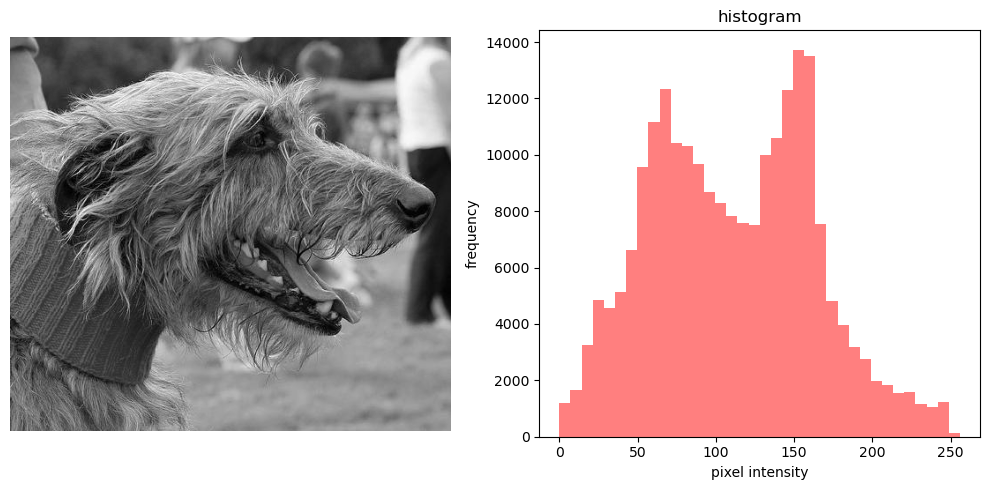

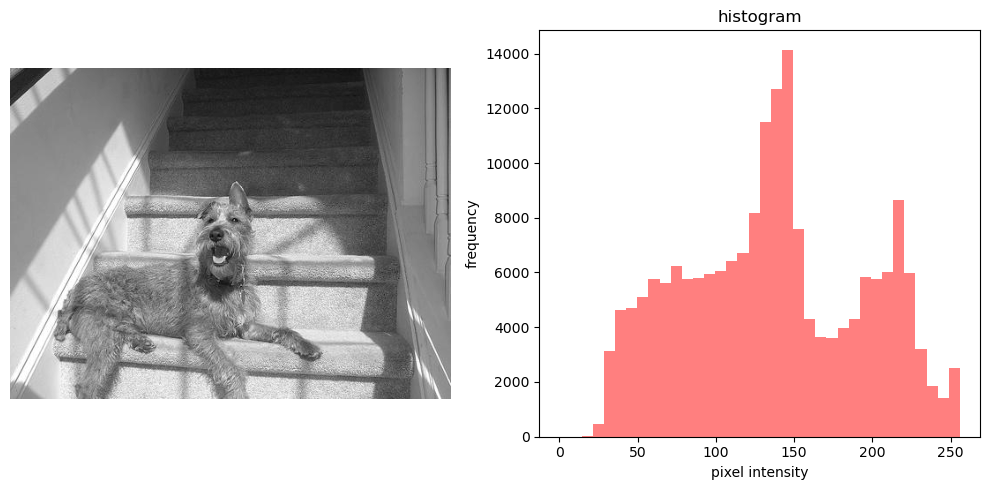

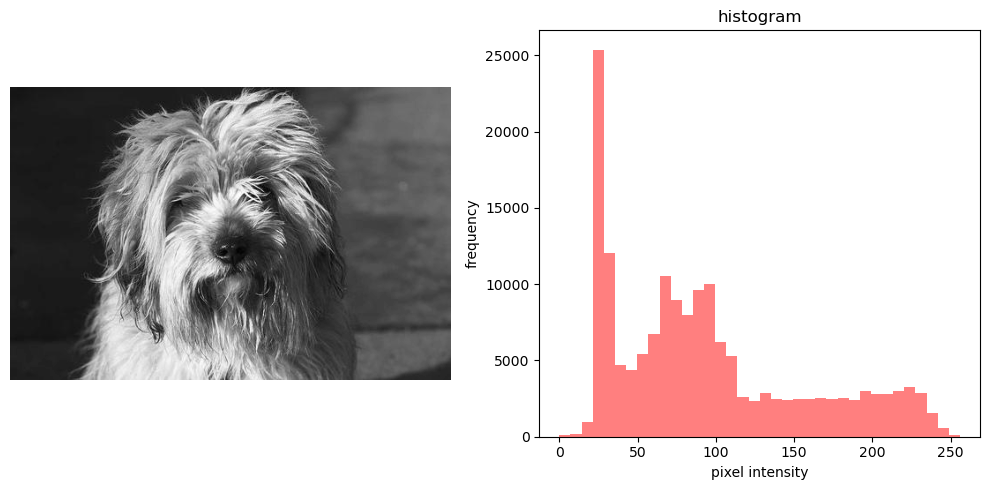

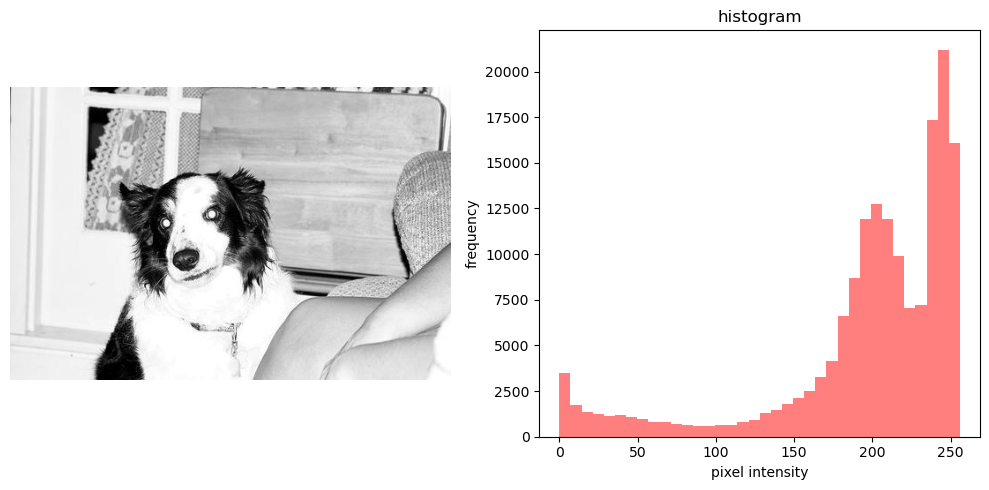

In [92]:
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
%matplotlib inline
def display_images_and_histogram(image_path):
    img = Image.open(image_path)
    gray_img = img.convert('L')
    pixel_values = np.asarray(gray_img).flatten()
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.hist(pixel_values, bins=36, range=(0, 256), color='red', alpha=0.5)
    plt.xlabel('pixel intensity')
    plt.ylabel('frequency')
    plt.title('histogram')
    plt.tight_layout()
    plt.show()
selected_images = [
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02092002-Scottish_deerhound'),
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02093991-Irish_terrier'),
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02097474-Tibetan_terrier'),
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02106166-Border_collie'),
]
for class_dir in selected_images:
    
    image_files = list(class_dir.glob('*.jpg'))  
    if image_files:
        
        display_images_and_histogram(image_files[0])
    else:
        print(f"No images found in {class_dir}")

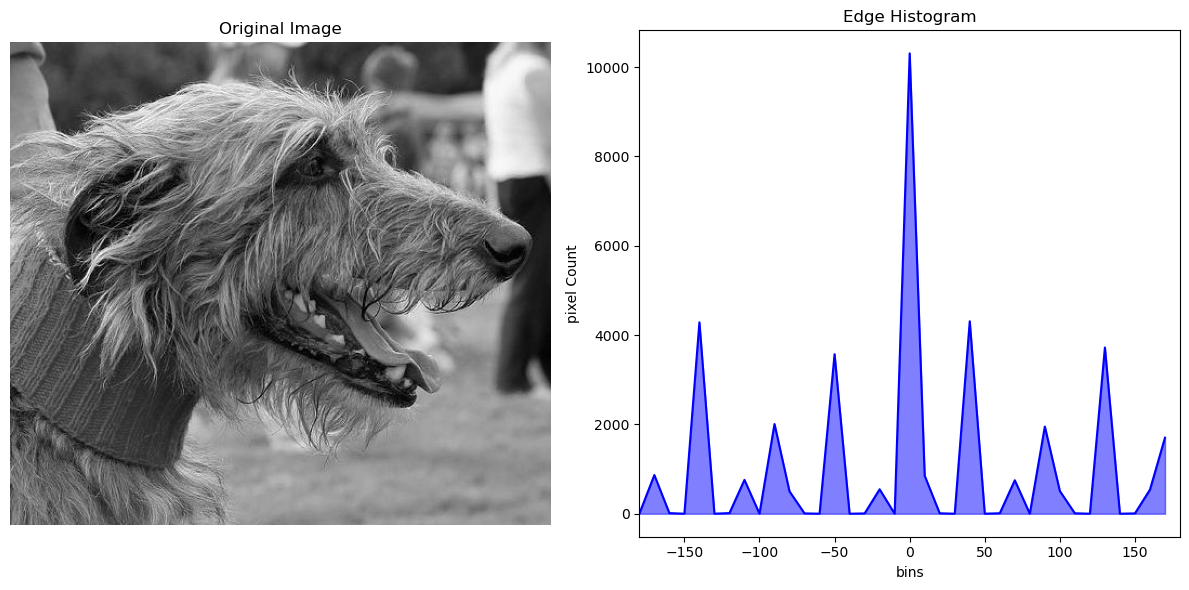

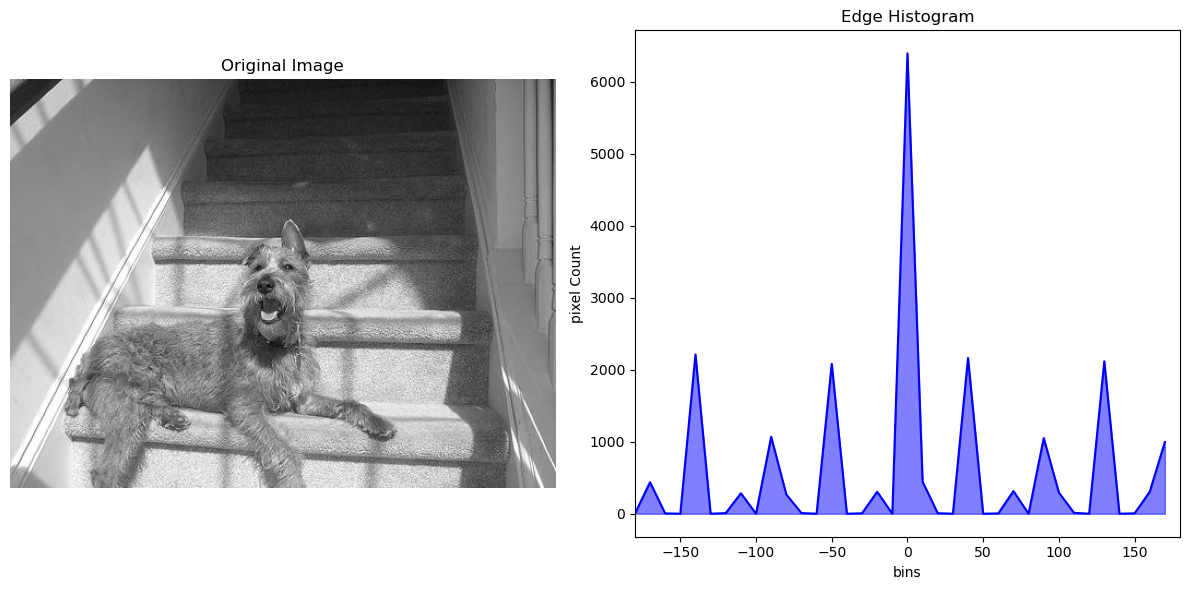

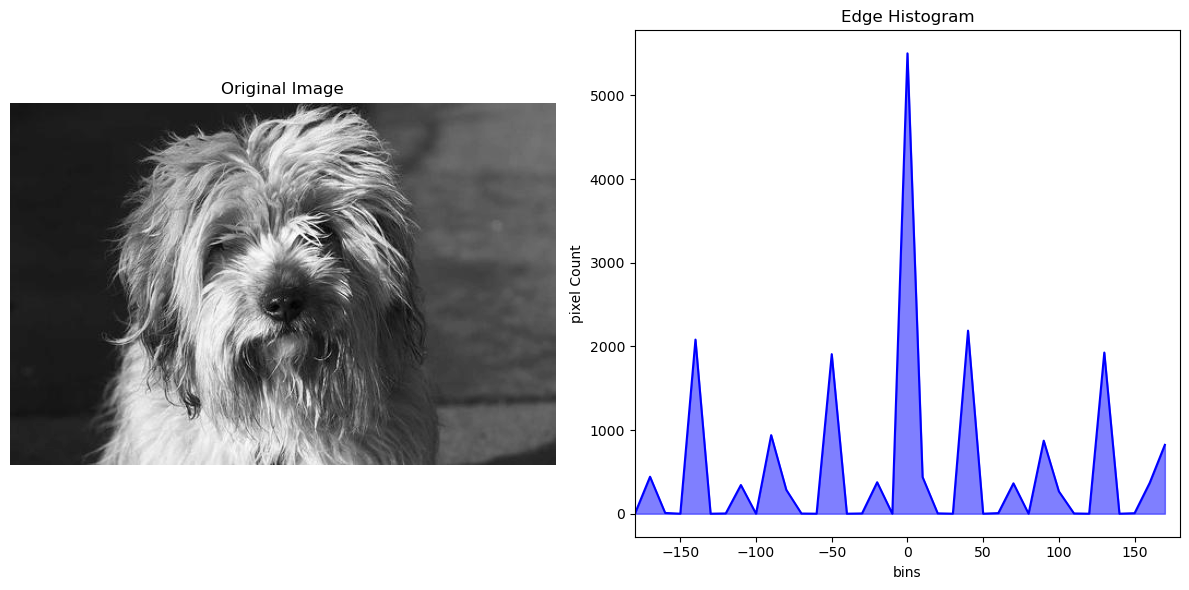

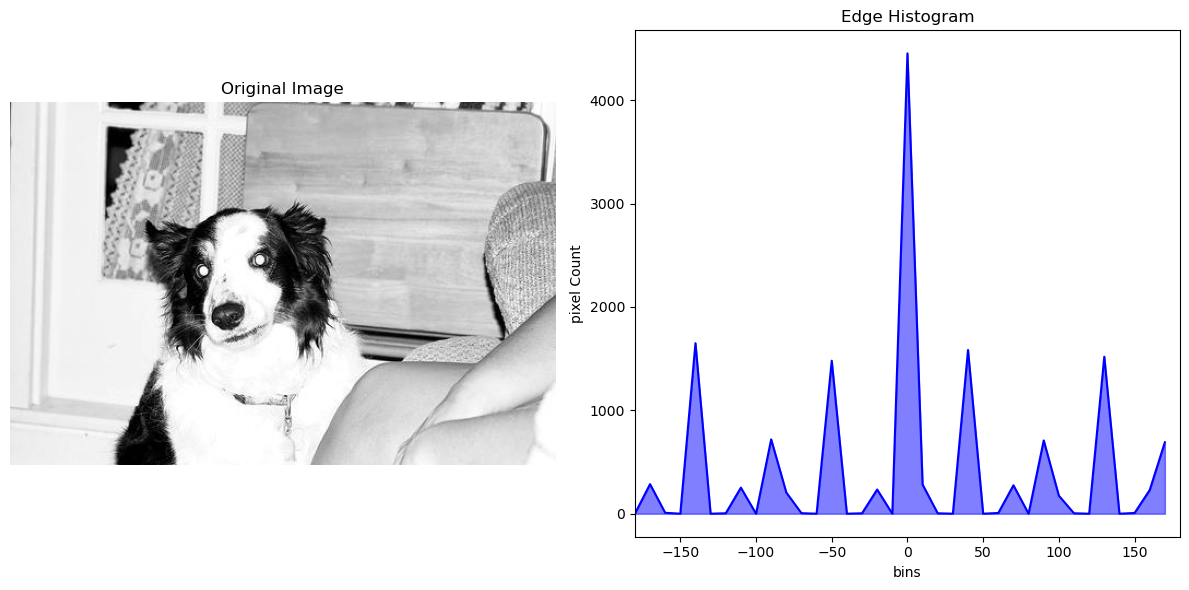

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import cv2
%matplotlib inline
def display_images_and_edge_histogram(image_path):
    img = Image.open(image_path)
    gray_img = img.convert('L')
    gray_img_array = np.asarray(gray_img)
    edges = cv2.Canny(gray_img_array, 100, 200)
    sobel_x = cv2.Sobel(edges, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(edges, cv2.CV_64F, 0, 1, ksize=3)
    gradient_angle = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)
    hist, bin_edges = np.histogram(gradient_angle[edges > 0], bins=36, range=(-180, 180))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.plot(bin_edges[:-1], hist, color='blue')
    plt.fill_between(bin_edges[:-1], hist, alpha=0.5, color='blue')
    plt.xlim([-180, 180])
    plt.xlabel('bins')
    plt.ylabel('pixel Count')
    plt.title('Edge Histogram')
    
    plt.tight_layout()
    plt.show()

selected_images = [
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02092002-Scottish_deerhound'),
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02093991-Irish_terrier'),
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02097474-Tibetan_terrier'),
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02106166-Border_collie'),
]

for class_dir in selected_images:
    image_files = list(class_dir.glob('*.jpg'))
    if image_files:
        display_images_and_edge_histogram(image_files[0])
    else:
        print(f"No images found in {class_dir}")


Euclidean Distance between first two images: 8419.8962
Manhattan Distance between first two images: 107556.0000
Cosine Distance between first two images: 0.1343


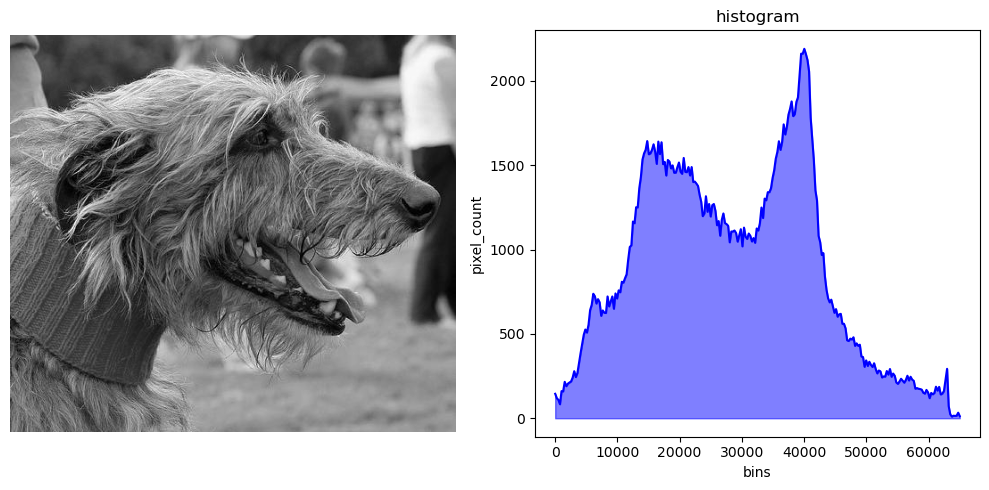

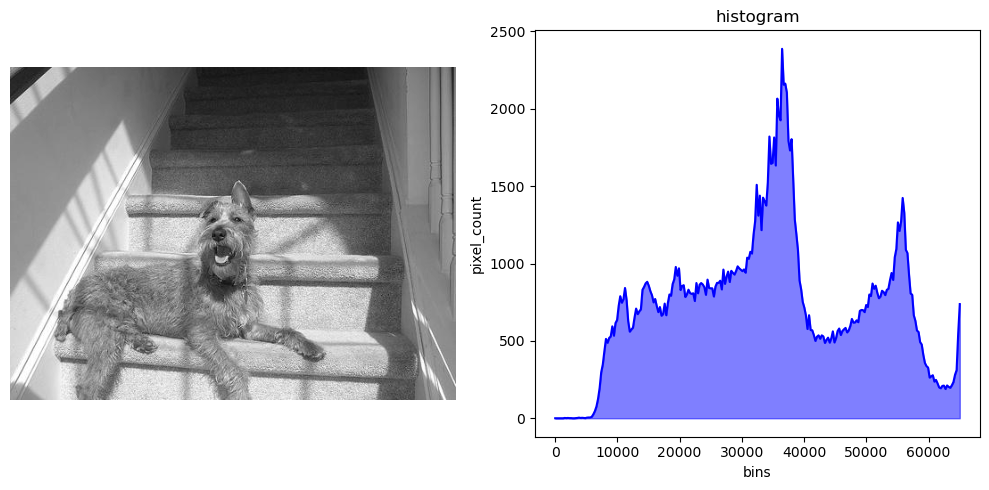

In [130]:
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
%matplotlib inline
from sklearn.metrics import pairwise
def display_images_and_edge_histogram(image_path):
    img = Image.open(image_path)
    gray_img = img.convert('L')
    pixel_values = np.asarray(gray_img).flatten()
    pixel_count, bin_edges = np.histogram(pixel_values, bins=256, range=(0, 256))
    if np.any(np.isnan(pixel_count)):
        print(f"NaN values found in histogram for {image_path}")
        return None
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.plot(bin_edges[:-1] * 255, pixel_count, color='blue') 
    plt.fill_between(bin_edges[:-1] * 255, pixel_count, alpha=0.5, color='blue')
    
    plt.xlabel('bins')
    plt.ylabel('pixel_count')
    plt.title('histogram')
    plt.tight_layout()
    return pixel_count
selected_images = [
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02092002-Scottish_deerhound'),
    Path(r'C:\Users\ADMIN\stanforddogs\cropped\n02093991-Irish_terrier'),
   ]
histograms = []
for class_dir in selected_images:
    image_files = list(class_dir.glob('*.jpg'))  
    if image_files:
        hist = display_images_and_edge_histogram(image_files[0]) 
        histograms.append(hist)
    else:
        print(f"No images found in {class_dir}")
if len(histograms) >= 2:
    hist1 = histograms[0]
    hist2 = histograms[1]
    euclidean_distance = pairwise.euclidean_distances([hist1], [hist2])[0][0]
    manhattan_distance = pairwise.manhattan_distances([hist1], [hist2])[0][0]
    cosine_distance = pairwise.cosine_distances([hist1], [hist2])[0][0]
    print(f"Euclidean Distance between first two images: {euclidean_distance:.4f}")
    print(f"Manhattan Distance between first two images: {manhattan_distance:.4f}")
    print(f"Cosine Distance between first two images: {cosine_distance:.4f}")
else:
    print("Not enough histograms to compare.")

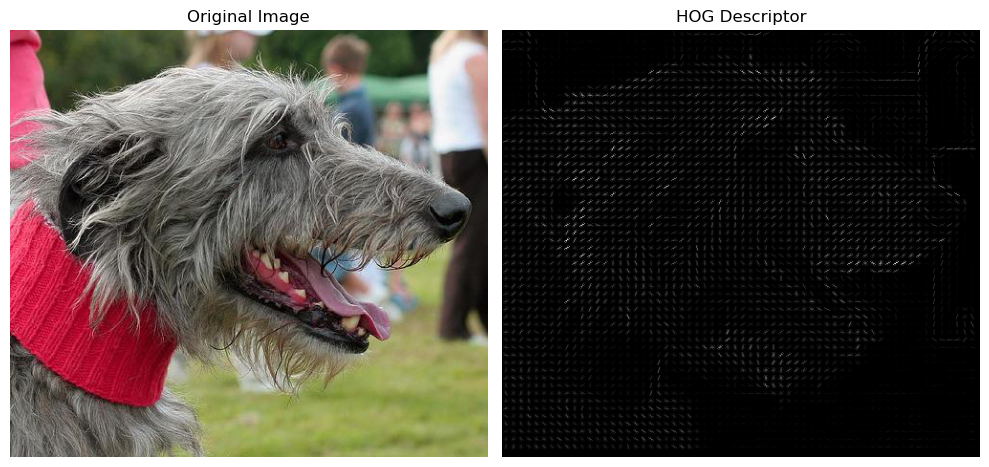

In [21]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.feature import hog
from skimage import exposure
import numpy as np
image_path = r'C:\Users\ADMIN\stanforddogs\cropped\n02092002-Scottish_deerhound\n02092002_3.jpg'
image = io.imread(image_path)
gray_image = color.rgb2gray(image)
hog_features, hog_image = hog(gray_image, visualize=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 1))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Descriptor')
plt.axis('off')
plt.tight_layout()
plt.show()


In [9]:
from pathlib import Path
images_dir = Path(r'C:\Users\ADMIN\stanforddogs\images')
def list_directories(dir_path):
    return [d for d in dir_path.iterdir() if d.is_dir()]
images_subdir = list_directories(images_dir)
selected_four_classes = images_subdir[:4]
selected_images = {}
for class_dir in selected_four_classes:

    image_files = list(class_dir.glob('*.jpg'))
    selected_images[class_dir.name] = image_files
for class_name, images in selected_images.items():
    print(f"Number of images from {class_name}: {len(images)}")


Number of images from n02092002-Scottish_deerhound: 232
Number of images from n02093991-Irish_terrier: 169
Number of images from n02097474-Tibetan_terrier: 206
Number of images from n02106166-Border_collie: 150


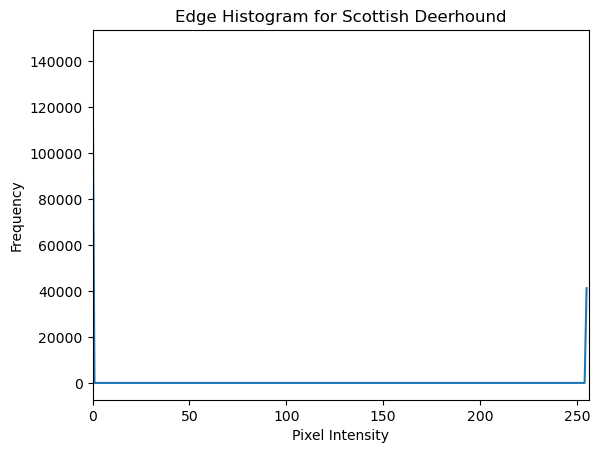

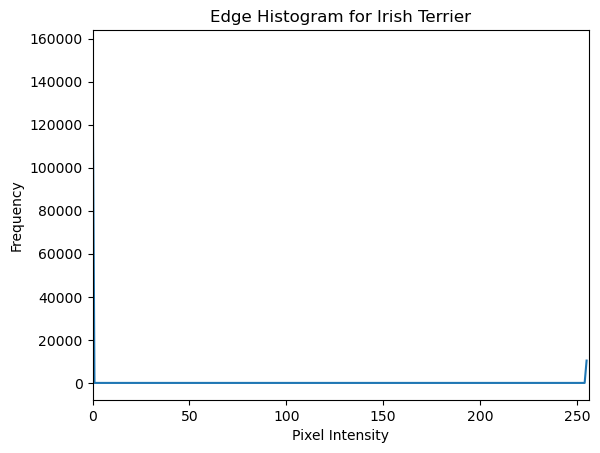

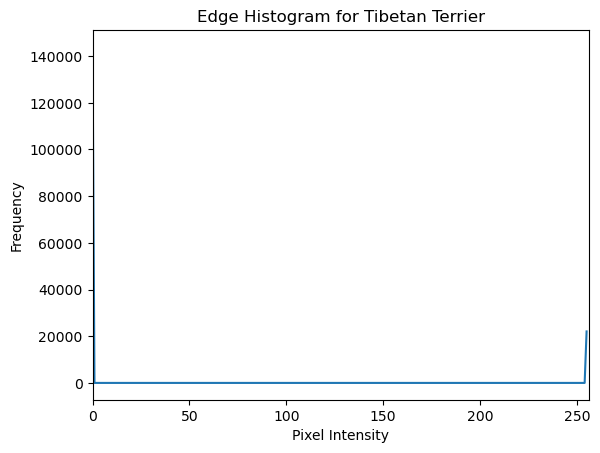

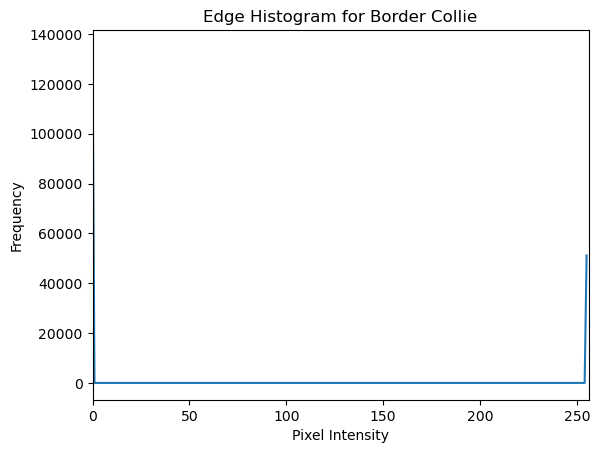

In [41]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
def load_images_from_class(class_dir):
    """Load all images from a given directory."""
    images = []
    for filename in os.listdir(class_dir):
        if filename.endswith(('.jpg')): 
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
    return images
def calculate_edge_histograms(images):
    """Calculate edge histograms for a list of images."""
    histograms = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray_img, 100, 200)
        hist = cv2.calcHist([edges], [0], None, [256], [0, 256])
        histograms.append(hist)
    return histograms
def process_classes(class_dirs):
    """Process images from all class directories and convert to edge histograms."""
    all_histograms = {}
    
    for class_name, class_dir in class_dirs.items():
        images = load_images_from_class(class_dir)
        histograms = calculate_edge_histograms(images)
        all_histograms[class_name] = histograms

    return all_histograms
class_dirs ={
    'Scottish Deerhound':(r'C:\Users\ADMIN\stanforddogs\images\n02092002-Scottish_deerhound'),
    'Irish Terrier':(r'C:\Users\ADMIN\stanforddogs\images\n02093991-Irish_terrier'),
    'Tibetan Terrier':(r'C:\Users\ADMIN\stanforddogs\images\n02097474-Tibetan_terrier'),
    'Border Collie':(r'C:\Users\ADMIN\stanforddogs\images\n02106166-Border_collie'),
}

edge_histograms = process_classes(class_dirs)
for class_name, histograms in edge_histograms.items():
    plt.figure()
    plt.title(f'Edge Histogram for {class_name}')
    plt.plot(histograms[0])
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.show()


In [49]:
from sklearn.decomposition import PCA
histograms = {
   r'C:\Users\ADMIN\stanforddogs\images\n02092002-Scottish_deerhound' : [np.random.rand(36) for _ in range(100)],
   r'C:\Users\ADMIN\stanforddogs\images\n02093991-Irish_terrier':[np.random.rand(36) for _ in range(100)],
    r'C:\Users\ADMIN\stanforddogs\images\n02097474-Tibetan_terrier':[np.random.rand(36) for _ in range(100)],
    r'C:\Users\ADMIN\stanforddogs\images\n02106166-Border_collie':[np.random.rand(36) for _ in range(100)],
    }

hist_list = [hist for class_hists in histograms.values() for hist in class_hists]
pca = PCA(n_components=2)
hist_reduced = pca.fit_transform(hist_list)
for idx, class_name in enumerate(histograms):
    num_hists = len(histograms[class_name])
    print(f"Reduced Histograms for {class_name}: {hist_reduced[idx * num_hists:(idx + 1) * num_hists]}")


Reduced Histograms for C:\Users\ADMIN\stanforddogs\images\n02092002-Scottish_deerhound: [[-2.49941524e-01 -2.76407618e-01]
 [ 6.87274148e-01 -5.68891633e-01]
 [-4.09748652e-01  3.01091400e-02]
 [-1.01903052e+00  4.72920260e-02]
 [-2.21117812e-01  5.04017502e-01]
 [-8.79454628e-02  7.49593764e-03]
 [ 7.61269562e-02 -5.71589271e-02]
 [-2.22727563e-02  2.55681286e-02]
 [ 2.40659243e-01  3.04402612e-02]
 [ 5.67923571e-02  1.28299836e-01]
 [ 7.18336015e-01 -2.13162444e-02]
 [ 9.94498554e-01 -3.59748770e-01]
 [ 2.42608001e-01 -3.60560229e-01]
 [ 2.31326026e-01  3.96903041e-01]
 [ 4.85784768e-02 -3.08806884e-01]
 [ 1.13686691e-01 -2.64953331e-01]
 [ 4.79305095e-02 -2.08519111e-01]
 [ 2.82377639e-01  2.56393833e-01]
 [ 2.98728541e-01  1.83469174e-01]
 [-3.32232607e-01 -1.77985590e-01]
 [-4.38409142e-01 -7.60221402e-02]
 [-3.12116518e-01 -3.75278863e-01]
 [ 5.57948481e-01 -4.78274166e-02]
 [ 2.20218135e-01 -2.52100700e-01]
 [-5.89031917e-01  2.95492165e-01]
 [-8.46762412e-01 -7.86779252e-02]
 [

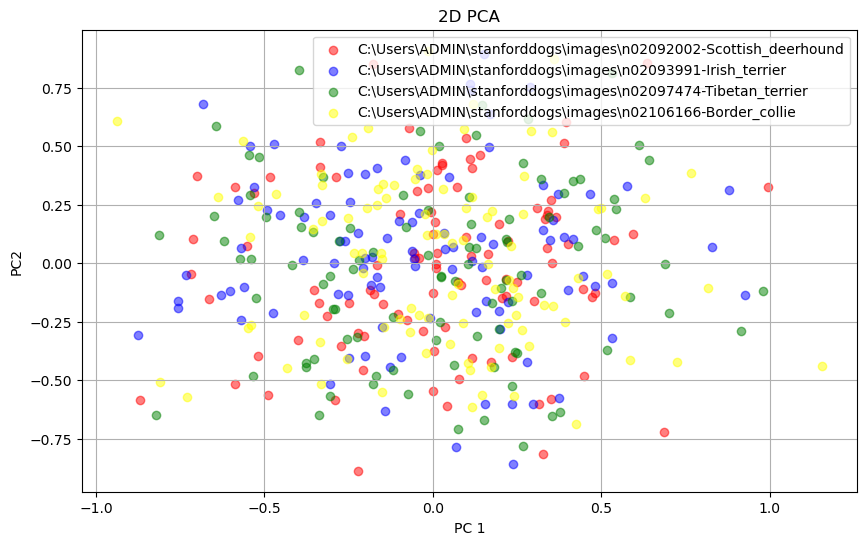

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
histograms = {
    r'C:\Users\ADMIN\stanforddogs\images\n02092002-Scottish_deerhound' : [np.random.rand(36) for _ in range(100)],
    r'C:\Users\ADMIN\stanforddogs\images\n02093991-Irish_terrier':[np.random.rand(36) for _ in range(100)],
    r'C:\Users\ADMIN\stanforddogs\images\n02097474-Tibetan_terrier':[np.random.rand(36) for _ in range(100)],
    r'C:\Users\ADMIN\stanforddogs\images\n02106166-Border_collie':[np.random.rand(36) for _ in range(100)],
}
hist_list = [hist for class_hists in histograms.values() for hist in class_hists]
hist_array = np.array(hist_list)
pca = PCA(n_components=2)
hist_reduced = pca.fit_transform(hist_array)

# Plotting
colors = ['red', 'blue', 'green', 'yellow']
labels = list(histograms.keys())
plt.figure(figsize=(10, 6))
start_idx = 0 

for idx, (class_name, class_hists) in enumerate(histograms.items()):
    end_idx = start_idx + len(class_hists)
    plt.scatter(hist_reduced[start_idx:end_idx, 0],
                hist_reduced[start_idx:end_idx, 1],  
                c=colors[idx], label=class_name, alpha=0.5)
    start_idx = end_idx

plt.xlabel('PC 1')
plt.ylabel('PC2')
plt.title('2D PCA')
plt.grid(True)
plt.legend()
plt.show()


In [46]:
import pandas as pd

json_path = r'C:\Users\ADMIN\data\train_.json.json'
data = pd.read_json(json_path)

print(data.head()) 


              ID                                              Tweet  anger  \
0  2017-En-10065  In 2016, Black people are STILL fighting to be...   True   
1  2017-En-21745  @Justin_Gau @JamesMelville You certainly would...   True   
2  2017-En-21992  If you follow #Trump, a certified #bully there...   True   
3  2017-En-21483  @Darren32895836 @FatimaFatwa it would be a gre...  False   
4  2017-En-40140  I forgot my hair straightner home, I'm feeling...   True   

   anticipation  disgust   fear    joy   love  optimism  pessimism  sadness  \
0         False     True  False  False  False     False      False    False   
1         False     True   True  False  False     False      False    False   
2         False     True  False  False  False     False      False    False   
3         False    False   True   True  False      True      False    False   
4         False     True  False  False  False     False       True     True   

   surprise  trust  
0     False  False  
1     False  F

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
json_path = r'C:\Users\ADMIN\data\train_.json.json'
data = pd.read_json(json_path)
texts = data['Tweet'].tolist()

labels = data[['anger', 'anticipation', 'disgust', 'fear', 'joy', 
               'love', 'optimism', 'pessimism', 'sadness', 
               'surprise', 'trust']].astype(str).agg(','.join, axis=1).tolist()

count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(texts)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(texts)
print("Count Vectorizer dimensions:", X_count.shape)
print("TF-IDF Vectorizer dimensions:", X_tfidf.shape)




Count Vectorizer dimensions: (3000, 9633)
TF-IDF Vectorizer dimensions: (3000, 9633)


In [92]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
json_path = r'C:\Users\ADMIN\data\train_.json.json'
data = pd.read_json(json_path)
texts = data['Tweet'].tolist()
emotions = []
for entry in data.itertuples(index=False):
    if entry.joy:
        emotions.append('disgust')
    elif entry.anger:
        emotions.append('anticipation')
    elif entry.sadness:
        emotions.append('love')
    elif entry.surprise:
        emotions.append('fear')
    else:
        emotions.append('Other')
df = pd.DataFrame({'Tweet': texts, 'class': emotions})
selected_class = ['disgust', 'anticipation', 'love', 'fear']
df_filtered = df[df['class'].isin(selected_class)
print("\nSelected Classes:")
for emotion in selected_class:
    print(f"- {emotion}")

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df_filtered['Tweet'])

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_filtered['Tweet'])

pca_count = PCA(n_components=2)
reduced_count_data = pca_count.fit_transform(count_matrix.toarray())

pca_tfidf = PCA(n_components=2)
reduced_tfidf_data = pca_tfidf.fit_transform(tfidf_matrix.toarray())
reduced_count_df = pd.DataFrame(data=reduced_count_data, columns=['PCA1', 'PCA2'])
reduced_count_df['Emotion'] = df_filtered['class'].reset_index(drop=True)

reduced_tfidf_df = pd.DataFrame(data=reduced_tfidf_data, columns=['PCA1', 'PCA2'])
reduced_tfidf_df['Emotion'] = df_filtered['class'].reset_index(drop=True)

print("\nReduced PCA Data (Count Vectorizer - first 10 entries):")
print(reduced_count_df.head(10))

print("\nReduced PCA Data (TF-IDF - first 10 entries):")
print(reduced_tfidf_df.head(10))



Selected Classes:
- disgust
- anticipation
- love
- fear

Reduced PCA Data (Count Vectorizer - first 10 entries):
       PCA1      PCA2       Emotion
0 -0.265033  0.454415  anticipation
1  0.214252 -0.157902  anticipation
2 -0.413439  1.462692  anticipation
3  0.562995  0.458395       disgust
4 -0.598724 -0.292262  anticipation
5 -0.373909 -0.299743  anticipation
6 -0.290709  0.771711       disgust
7  1.045075 -0.514003       disgust
8  0.837460  1.036364       disgust
9  0.651966 -0.420258       disgust

Reduced PCA Data (TF-IDF - first 10 entries):
       PCA1      PCA2       Emotion
0 -0.021681  0.004509  anticipation
1 -0.030180  0.051719  anticipation
2 -0.087973  0.172641  anticipation
3 -0.018387 -0.026111       disgust
4  0.018268 -0.048186  anticipation
5 -0.009858  0.000849  anticipation
6 -0.016690  0.008065       disgust
7 -0.003913 -0.080778       disgust
8 -0.091040  0.068190       disgust
9 -0.012502 -0.066799       disgust


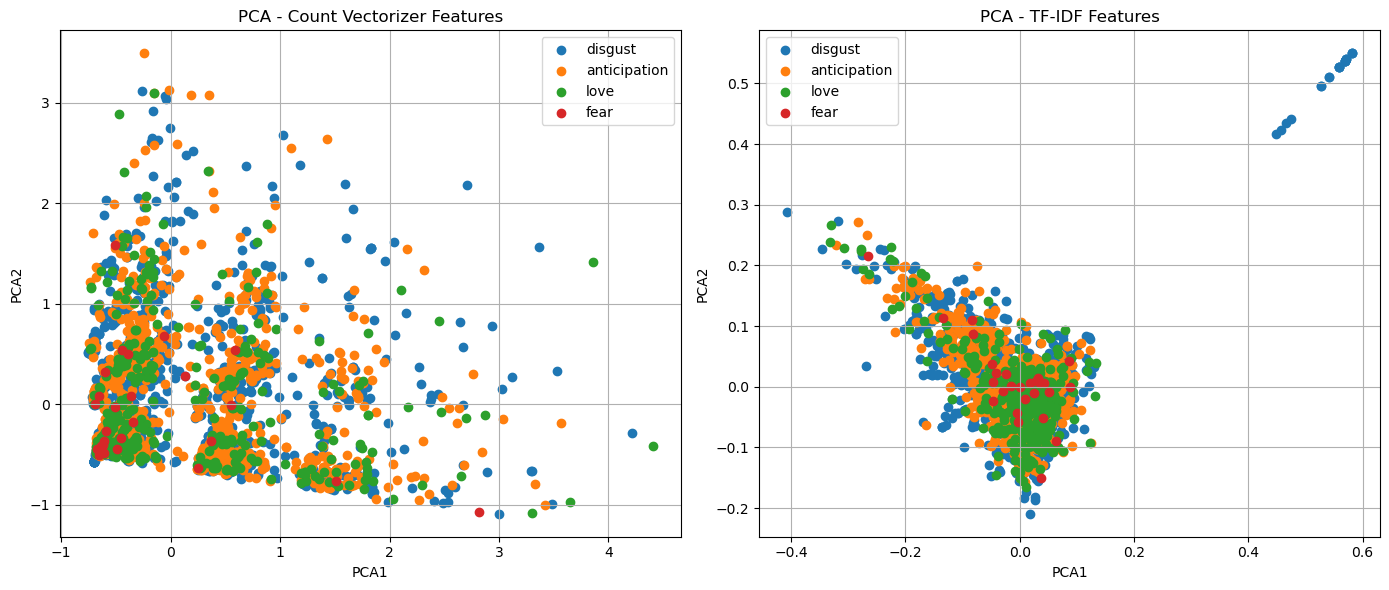

In [102]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for emotion in selected_classes:
    subset = reduced_count_df[reduced_count_df['Emotion'] == emotion]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=emotion)

plt.title('PCA - Count Vectorizer Features')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
for emotion in selected_classes:
    subset = reduced_tfidf_df[reduced_tfidf_df['Emotion'] == emotion]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=emotion)

plt.title('PCA - TF-IDF Features')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
